<a href="https://colab.research.google.com/github/Julian-Ramirez-M/Talleres/blob/main/Proyecto_Final_Juliana_Pardo_Juli%C3%A1n_Ram%C3%ADrez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Planteamiento**

Tema: Optimizaciónn de la producción, para maximizar la utilidad y simulación de la demanda, para comprobar si satisface el supuesto de la maximización de la utilidad.

**Producto A** (galletas de chocolate): Para la producción de una unidad se necesita 5 gramos de harina, 8 gramos de chocolate y 2 gramos de sal además dicha producción tiene un costo de $2000. 

**Producto B** (galletas de cereza): Para la producción de una unidad se necesita 7 gramos de harina, 12 gramos de endulzante de cereza y 3 gramos de sal, con un costo de $3500.

**Inventario de Materia Prima:** 

Harina: 100.000 gramos

Chocolate: 25.000 gramos

Sal: 50.000 gramos

Endulzante de cereza: 12.000 gramos 

**Utilidad**

Galletas de chocolate: Con un precio de venta de $3500 la ganancia por unidad producida es de \$1500.

Galletas de cereza: Con un precio de venta de $6000, la ganancia por unidad producida es de \$2500.

**Producción**

Se necesita una producción 480 unidades de galletas de chocolate y 590 unidades de galletas de cereza, para satisfacer la demanda del mercado.









In [1]:
#Librerías
import numpy as np
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import linprog

In [2]:
tab_1 = pd.DataFrame({"": ["Harina", "Chocolate", "Sal", "Dulce cereza", "Utilidad - $"],
                   "Galletas Chocolate" : [5, 8, 2, 0, 1500],
                   "Galletas Cereza" : [7, 0, 3, 12, 2500]})
tab_1

,,Galletas Chocolate,Galletas Cereza
0,Harina,5,7
1,Chocolate,8,0
2,Sal,2,3
3,Dulce cereza,0,12
4,Utilidad - $,1500,2500


In [3]:
utilidad = np.array([1500, 2500])
A = np.array([[5,7],
              [8,0],
              [2,3],
              [0,12]])
B = np.array([100000,25000,50000,12000])
dem_1 = 480
dem_2 = 590
lim = [(dem_1, None),
       (dem_2, None)]
ans = linprog(-utilidad, A_ub=A, b_ub=B, bounds=lim, method="revised simplex")
ans.x

<ipython-input-3-16b3f3a08b19>:11: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  ans = linprog(-utilidad, A_ub=A, b_ub=B, bounds=lim, method="revised simplex")


array([3125., 1000.])

**La producción optima opara satisfacer la demanda de 480 galletas de chocolate y 590 galletas de cereza es de 3125 y 1000.**


In [4]:
Uti_cho = 3125*1500
Uti_cho

4687500

In [5]:
Uti_cer = 1000*2500
Uti_cer

2500000

In [6]:
Uti_fnl = Uti_cer+Uti_cho
Uti_fnl

7187500


Basado en los resultados de la producción optima y las utilidades por unidades producidas, se llegó al dato de utilidad neta de galletas de chcolate, \$4.687.500, y de galletas de cereza, \$2.500.000, dando como resultado final de utlidades \$7.187.500. 

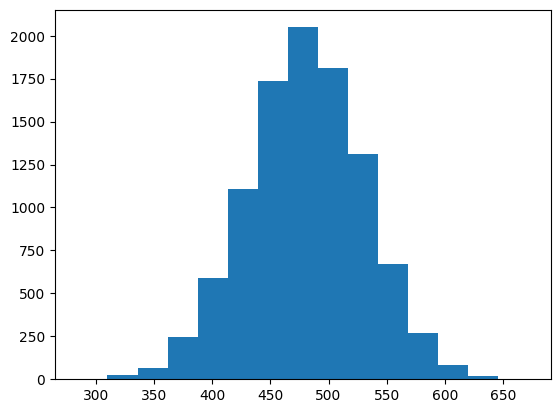

In [7]:
# Simulación
sigma_dem1 = 50
sim_a = np.random.normal(dem_1,sigma_dem1, 10000)
plt.hist(sim_a, bins= 'sturges'); 

In [8]:
sim_a[4]

488.2268997760231

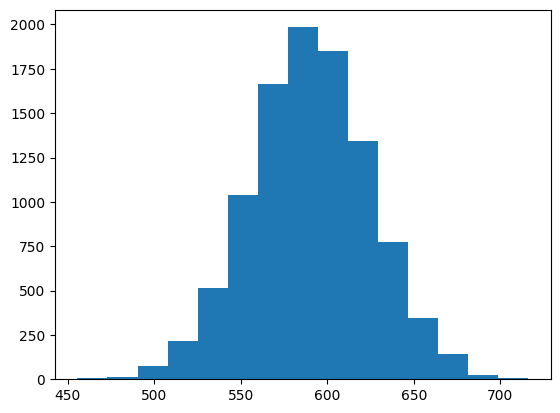

In [9]:
# Simulación
sigma_dem2 = 35
sim_b = np.random.normal(dem_2,sigma_dem2, 10000)
plt.hist(sim_b, bins= 'sturges'); 

In [10]:
sim_a[:-1]

array([465.57571935, 525.59865392, 432.55999915, ..., 512.45605047,
       476.08313119, 559.99622703])

In [11]:
dem = np.zeros((10000,2))
for i in range(10000):
  utilidad = np.array([1500, 2500])
  A = np.array([[5,7],
              [8,0],
              [2,3],
              [0,12]])
  B = np.array([100000,25000,50000,12000])
  dem_1 = sim_a[i]
  dem_2 = sim_b[i]
  lim = [(dem_1, None),
        (dem_2, None)]
  ans = linprog(-utilidad, A_ub=A, b_ub=B, bounds=lim, method="revised simplex")
  dem[i:] = ans.x
  dem

<ipython-input-11-1dc3a1e55399>:13: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  ans = linprog(-utilidad, A_ub=A, b_ub=B, bounds=lim, method="revised simplex")


In [12]:
dem

array([[3125., 1000.],
       [3125., 1000.],
       [3125., 1000.],
       ...,
       [3125., 1000.],
       [3125., 1000.],
       [3125., 1000.]])

**Conclusión**

Teniendo en cuenta el procedimiento de simulación con 10.000 iteraciones, se llegó a la conclusión que la producción siempre va a satisfacer la demanda bajo los mismos niveles de producción, 3.125 galletas de chocolate y 1.000 galletas de cereza. Esto se debe a que el rango de los valores iterados siempre se encuentran por debajo de los niveles de produccón.

**Consideraciones**

Para llegar a un resultado más acertado, se recomienda cambiar la variable dependiente, demanda, por la utilidad, de esta manera la producción cambiara en las simulaciones en función a la utilidad.